In [ ]:
#Mount Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

# Import Libraries and Data

***Import Packages and Libraries***

In [ ]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas
from sklearn.model_selection import train_test_split
import numpy

import numpy as np #Linear Algebra
import pandas as pd #Data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score

import numpy as np
import pandas as pd
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import matplotlib

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
 
import string
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline
% matplotlib inline

from textblob import TextBlob

#Input data files are available in the "../input/" directory.
#For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#To print mulitple statements in single command 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

***Import and Visualize Data***

In [ ]:
df = pd.read_excel('Comments_Data_Extracts_01.xlsx')
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9546 entries, 0 to 9545
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Comments  9546 non-null   object
dtypes: object(1)
memory usage: 74.7+ KB


(9546, 1)

In [ ]:
df.head()
df.columns
len(df)

,Comments
0,I just bought this projector and i am clueless...
1,You promised me a multi card reader for leavin...
2,"Hello Apeman, your team is not responding to m..."
3,"Great picture, I am so excited about looking f..."
4,I have just bought the Apeman 550 dashcam and ...


Index(['Comments'], dtype='object')

9546

In [ ]:
print(df)

                                               Comments
0     I just bought this projector and i am clueless...
1     You promised me a multi card reader for leavin...
2     Hello Apeman, your team is not responding to m...
3     Great picture, I am so excited about looking f...
4     I have just bought the Apeman 550 dashcam and ...
...                                                 ...
9541  Did You see it? 🙈https://t.co/X1b3ZyrGbeLet th...
9542  4inch FHD 1080P DVR camera RecorderWhatsApp/We...
9543  📷 4inch FHD 1080P DVR camera Recorder WhatsApp...
9544  #autobrighttech #AutobrightTech #caraccessorie...
9545  📷 #autobrighttech #AutobrightTech #caraccessor...

[9546 rows x 1 columns]


# Text Preprocessing & EDA

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from textblob import TextBlob

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Spell correct using text blob for the first 1000 records
from textblob import TextBlob
dfs = df['Comments'][:5].apply(lambda x: str(TextBlob(x).correct()))

In [ ]:
dfs

0    I just bought this protector and i am careless...
1    You promised me a multi card reader for leavin...
2    Hello Apeman, your team is not responding to m...
3    Great picture, I am so excited about looking f...
4    I have just bought the Apeman 550 dashcam and ...
Name: Comments, dtype: object

In [ ]:
corpus = [] # form an empty list called corpus
ps = PorterStemmer() # for stemming the words to original form, for example - "running to run"
stop_words = set(stopwords.words('english')) # remove words such as will, I, and, at etc.
for i in range(0, 9546): # iterate through the list of all 9546 comments
  # remove handles (@), numbers, urls, emojis and any other special characters to have only text
  df_cln = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|[0-9]", '',df.Comments[i])
  # convert all words to lower case
  df_cln = df_cln.lower()
  # split sentences into words
  df_cln = df_cln.split()
  # remove English stop words
  df_cln = [x for x in df_cln if not x in stop_words]
  # stem words to the base form
  df_cln = [ps.stem(x) for x in df_cln]
  # join words to form the original sentences
  df_cln = " ".join(df_cln)
  # append to the list to get all Comments in one place
  corpus.append(df_cln)
#print(corpus)

# PoS Tagging
Ref: https://www.kaggle.com/tarunpaparaju/jigsaw-competition-part-of-speech-tagging

In [ ]:
import os
import numpy as np

import pandas as pd
from tqdm import tqdm
tqdm.pandas()

from nltk import word_tokenize, pos_tag
from collections import Counter

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm, tqdm_notebook
tqdm_notebook().pandas()
pos_tags = df['Comments'].progress_apply(lambda x: pos_tag(word_tokenize(x)))
targets = df['Comments']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
print(pos_tags[100])

[('Full', 'NNP'), ('link', 'NN'), ('in', 'IN'), ('bio', 'NN'), ('☠🏆🚔🚨📸🎥', 'NNP'), ('#', '#'), ('london', 'RB'), ('#', '#'), ('dashcam', 'JJ'), ('#', '#'), ('driving', 'VBG'), ('#', '#'), ('ukdashcams', 'JJ'), ('#', '#'), ('ukbikers', 'NNS'), ('#', '#'), ('fails', 'NNS'), ('#', '#'), ('dashcamfails', 'NNS'), ('#', '#'), ('drivingfails', 'NNS'), ('#', '#'), ('roadrage', 'NN'), ('#', '#'), ('drivesafe', 'JJ'), ('#', '#'), ('roadsafetyawareness', 'JJ'), ('#', '#'), ('apemandashcam', 'JJ'), ('#', '#'), ('apemancamera', 'NN'), ('#', '#'), ('sonyvegas', 'JJ'), ('#', '#'), ('videoedits', 'NNS'), ('#', '#'), ('editfun…', 'JJ'), ('https', 'NN'), (':', ':'), ('//t.co/fknBB6GVS9', 'NN')]


In [ ]:
tags = []
for i, tag in enumerate(pos_tags):
    pos_tags[i] = list(map(list, tag))
    tags.append(np.array(pos_tags[i])[:, 1])
flat_tags = np.concatenate([tag for tag in tags])

In [ ]:
counts = [dict(Counter(tag)) for tag in tags]

In [ ]:
def count_pos(tag_dict, tag_name):
    if tag_name in tag_dict:
        return tag_dict[tag_name]
    else:
        return 0

In [ ]:
DATA_LEN = 1804874
SAMPLE_SIZE = 9546
all_tags = set(flat_tags)
df = pd.DataFrame(np.zeros((SAMPLE_SIZE, 1)))
df.columns = ['Comments']
df.count_dict = counts
df.target = targets

In [ ]:
all_tags

{'#',
 '$',
 "''",
 '(',
 ')',
 ',',
 '.',
 ':',
 'CC',
 'CD',
 'DT',
 'EX',
 'FW',
 'IN',
 'JJ',
 'JJR',
 'JJS',
 'LS',
 'MD',
 'NN',
 'NNP',
 'NNPS',
 'NNS',
 'PDT',
 'POS',
 'PRP',
 'PRP$',
 'RB',
 'RBR',
 'RBS',
 'RP',
 'SYM',
 'TO',
 'UH',
 'VB',
 'VBD',
 'VBG',
 'VBN',
 'VBP',
 'VBZ',
 'WDT',
 'WP',
 'WRB',
 '``'}

# Bag of Words

In [ ]:
bagofwords=[]
for i in range (0,9546):
    words = corpus[i].split()
    bagofwords.append(words)

In [ ]:
bagofwords[9545]

['autobrighttech',
 'autobrighttech',
 'caraccessori',
 'autoaccessori',
 'otoaccessori',
 'vehicleaccessori',
 'dvr',
 'dvrcamera',
 'dvr',
 'dvr',
 'dvr',
 'dvrl',
 'carcamera',
 'carcamerarecord',
 'carcamerajapan',
 'carcamera',
 'carcamera']

In [ ]:
import itertools
import collections
all_words=list(itertools.chain(*bagofwords))
print(all_words[0:9546])
print()
print('Most commonly occuring words and frequency\n')
words_freq=collections.Counter(all_words)
words_freq.most_common(20)

['bought', 'projector', 'clueless', 'connect', 'iphon', 'promis', 'multi', 'card', 'reader', 'leav', 'review', 'im', 'still', 'wait', 'susi', 'hello', 'apeman', 'team', 'respond', 'email', 'fix', 'issu', 'multipl', 'follow', 'up', 'great', 'pictur', 'excit', 'look', 'k', 'camerajust', 'need', 'price', 'come', 'littl', 'look', 'forward', 'futur', 'adventur', 'run', 'camera', 'thejogshop', 'brighton', 'runningrunp', 'puresportsperformac', 'ukrunchat', 'bought', 'apeman', 'dashcam', 'find', 'rear', 'camer', 'cabl', 'metr', 'short', 'anyon', 'got', 'idea', 'get', 'short', 'extens', 'possibl', 'tri', 'price', 'terribl', 'compani', 'product', 'china', 'sayhidden', 'design', 'hid', 'hello', 'camera', 'apeman', 'app', 'use', 'wifi', 'bad', 'news', 'apeman', 'put', 'mine', 'garbag', 'done', 'cheap', 'product', 'good', 'trailcam', 'got', 'apeman', 'excel', 'may', 'know', 'price', 'ill', 'test', 'c', 'dash', 'cam', 'advertis', 'say', 'card', 'includedbuy', 'person', 'could', 'order', 'one', 'time

[('gadget', 2611),
 ('car', 1031),
 ('tech', 741),
 ('new', 549),
 ('electriccar', 509),
 ('via', 453),
 ('electr', 432),
 ('technolog', 424),
 ('autonomousvehicl', 415),
 ('smart', 378),
 ('watch', 374),
 ('camera', 372),
 ('travel', 337),
 ('electron', 336),
 ('use', 305),
 ('selfdriv', 283),
 ('amp', 282),
 ('drive', 280),
 ('autonom', 279),
 ('vehicl', 272)]

# Word Frequency

In [ ]:
freq_word_df = pd.DataFrame(words_freq.most_common(20),columns=['words','Freq'])
freq_word_df.head()

,words,Freq
0,gadget,2611
1,car,1031
2,tech,741
3,new,549
4,electriccar,509


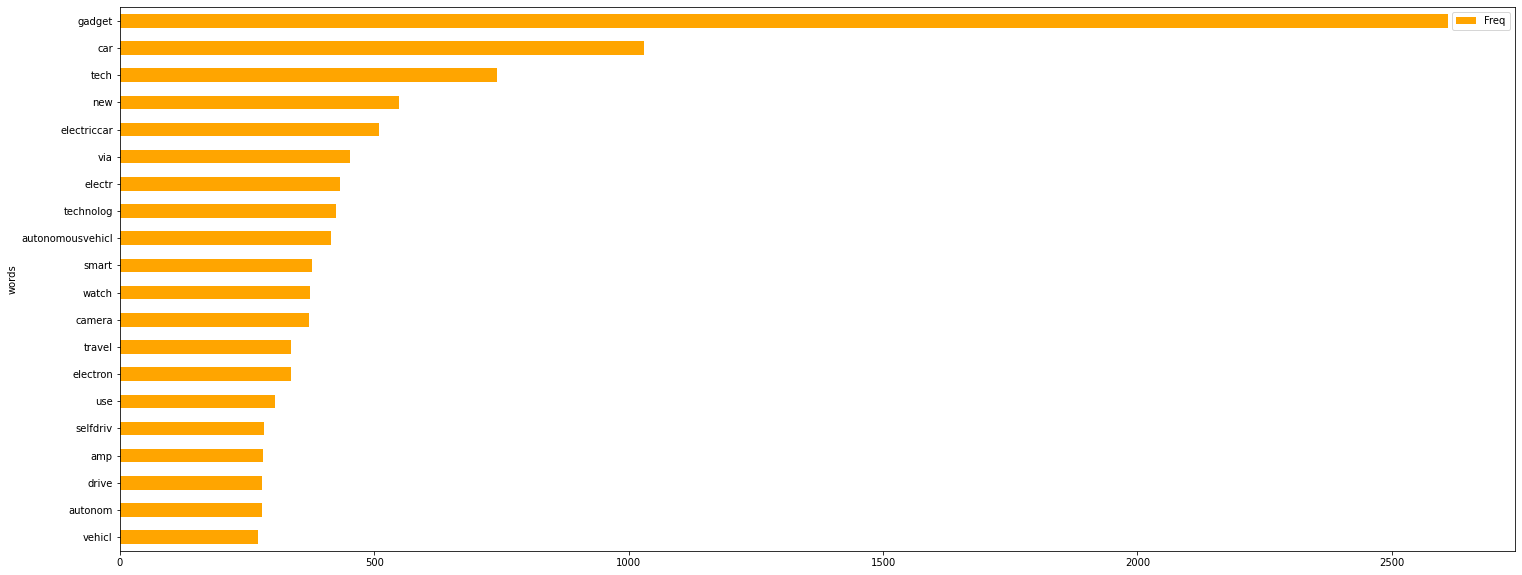

In [ ]:
fig,ax=plt.subplots(figsize=(25,10))
freq_word_df.sort_values(by='Freq').plot.barh(x='words',y='Freq',ax=ax,color='orange')
plt.show();

# Word Cloud

In [ ]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
word_string=' '.join(freq_word_df.words)
wordcloud=WordCloud(#stopwords=STOPWORDS,
                       background_color='black',
                     max_words=20
                      ).generate(word_string)

<Figure size 1080x720 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

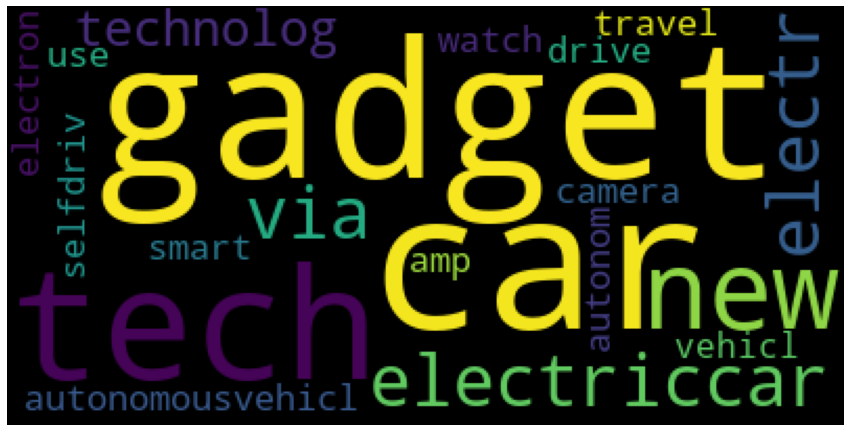

In [ ]:
plt.figure(figsize=(15,10))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Word2Vec

In [ ]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from gensim.models import Word2Vec

word2vec = Word2Vec(bagofwords, min_count=2)

In [ ]:
vocabulary = word2vec.wv.vocab
print(vocabulary)

{'bought': <gensim.models.keyedvectors.Vocab object at 0x7f0d7db32908>, 'projector': <gensim.models.keyedvectors.Vocab object at 0x7f0d7db329e8>, 'connect': <gensim.models.keyedvectors.Vocab object at 0x7f0d7db32d68>, 'iphon': <gensim.models.keyedvectors.Vocab object at 0x7f0d7db32518>, 'promis': <gensim.models.keyedvectors.Vocab object at 0x7f0d7db32208>, 'multi': <gensim.models.keyedvectors.Vocab object at 0x7f0d8c6ce6a0>, 'card': <gensim.models.keyedvectors.Vocab object at 0x7f0d8c6ce6d8>, 'reader': <gensim.models.keyedvectors.Vocab object at 0x7f0d8c6ce710>, 'leav': <gensim.models.keyedvectors.Vocab object at 0x7f0d8c6ce748>, 'review': <gensim.models.keyedvectors.Vocab object at 0x7f0d8f3d5128>, 'im': <gensim.models.keyedvectors.Vocab object at 0x7f0d8f3d5048>, 'still': <gensim.models.keyedvectors.Vocab object at 0x7f0d8f3d5dd8>, 'wait': <gensim.models.keyedvectors.Vocab object at 0x7f0d8f3d5828>, 'hello': <gensim.models.keyedvectors.Vocab object at 0x7f0d8f3d5eb8>, 'apeman': <gens

In [ ]:
v1 = word2vec.wv['gadget']

In [ ]:
sim_words = word2vec.wv.most_similar('gadget')

In [ ]:
sim_words

[('techgadget', 0.993708610534668),
 ('esitetech', 0.9915121793746948),
 ('gadgetshop', 0.990992546081543),
 ('techi', 0.9882433414459229),
 ('esitetechdevic', 0.985610842704773),
 ('geek', 0.9852010011672974),
 ('videogam', 0.9833407998085022),
 ('item', 0.9717795848846436),
 ('warcraft', 0.9715831279754639),
 ('gadgetstor', 0.9679287672042847)]

# Lexicon Model

In [ ]:
lex_file = open("AFINN-111.csv")

In [ ]:
word_list = []
print(word_list)
for  record in df:
    print("record")
    print(record)
    print("tokens")
    tokens = record.split()
    print(tokens)
    words = []
    for word in tokens:
        words.append(word.lower())
        print(words)
    
    word_list.append(words)
print("word_list")
print(word_list)

[]
record
Comments
tokens
['Comments']
['comments']
word_list
[['comments']]


In [ ]:
#Strip the records and create a word list for each tweet
word_list = []
for record in (corpus):# for record in (comments):
    #print(record)
    words = []
    tokens = record.split()
    #print(tokens)
    for token in tokens:
        words.append(token.lower())
    word_list.append(words)  
    
#word_list 

In [ ]:
lexicons = {}
records = lex_file.readlines()
for record in records:
    #print(record) # line contains newline charecter
    #print(record.rstrip('\n').split(",")) - to remove new line charecter
    lexicons[record.rstrip('\n').split(",")[0]] = int(record.rstrip('\n').split(",")[1])
print(lexicons)
#lexicons["abandon"]

{'\ufeffabandon': -2, 'abandoned': -2, 'abandons': -2, 'abducted': -2, 'abduction': -2, 'abductions': -2, 'abhor': -3, 'abhorred': -3, 'abhorrent': -3, 'abhors': -3, 'abilities': 2, 'ability': 2, 'aboard': 1, 'absentee': -1, 'absentees': -1, 'absolve': 2, 'absolved': 2, 'absolves': 2, 'absolving': 2, 'absorbed': 1, 'abuse': -3, 'abused': -3, 'abuses': -3, 'abusive': -3, 'accept': 1, 'accepted': 1, 'accepting': 1, 'accepts': 1, 'accident': -2, 'accidental': -2, 'accidentally': -2, 'accidents': -2, 'accomplish': 2, 'accomplished': 2, 'accomplishes': 2, 'accusation': -2, 'accusations': -2, 'accuse': -2, 'accused': -2, 'accuses': -2, 'accusing': -2, 'ache': -2, 'achievable': 1, 'aching': -2, 'acquit': 2, 'acquits': 2, 'acquitted': 2, 'acquitting': 2, 'acrimonious': -3, 'active': 1, 'adequate': 1, 'admire': 3, 'admired': 3, 'admires': 3, 'admiring': 3, 'admit': -1, 'admits': -1, 'admitted': -1, 'admonish': -2, 'admonished': -2, 'adopt': 1, 'adopts': 1, 'adorable': 3, 'adore': 3, 'adored': 3

In [ ]:
strength = []
for Comments in word_list:
    score = 0
    for word in Comments:
        if word in (lexicons):
            score = score + lexicons[word]
    strength.append(score)

In [ ]:
senti_matrix = pd.DataFrame(strength, df.Comments)

In [ ]:
senti_matrix[0:10]

,0
Comments,
0.0,-2
0.0,0
0.0,0
0.0,3
0.0,0
...,...
0.0,4
0.0,0
0.0,0


In [ ]:
#Export to Excel
from pandas import ExcelWriter
writer = ExcelWriter('export_User_Comments_Lexicon_AFINN.xlsx')
senti_matrix.to_excel(writer,'Sheet1',index=False)
writer.save()

# Polarity by TextBlob

In [ ]:
sentiment_text = [TextBlob(Comments) for Comments in corpus]
print(sentiment_text[10].polarity)
print(sentiment_text[10])

-0.1499999999999999
bad news apeman put mine garbag done cheap product


In [ ]:
sentiments = [[Comments.sentiment.polarity, str(Comments)] for Comments in sentiment_text]
sentiment_df = pd.DataFrame(sentiments, columns=["Polarity","User Comments"])
sentiment_df.sort_values(by='Polarity',ascending=False)  

,Polarity,User Comments
5626,1.0,digitalchamb gadget hardwar review tc adobelig...
9059,1.0,best ball sincebal
414,1.0,tell truth princ ea one best messag yet watch ...
9273,1.0,best size buck
425,1.0,laughter best medicin amp headlin deliv infota...
...,...,...
2190,-0.8,googl interest hardwar announc rank googl
2898,-0.8,scienc confirm consum hate overcook pork chop ...
832,-1.0,evil lurk night alexhest evil almost readi ssa...
6747,-1.0,bleak futur singleoccup autonom car could incr...


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0d8041cac8>],
      dtype=object)

Text(0.5, 1.0, 'Sentiments Distribution on Automotive Gadgets')

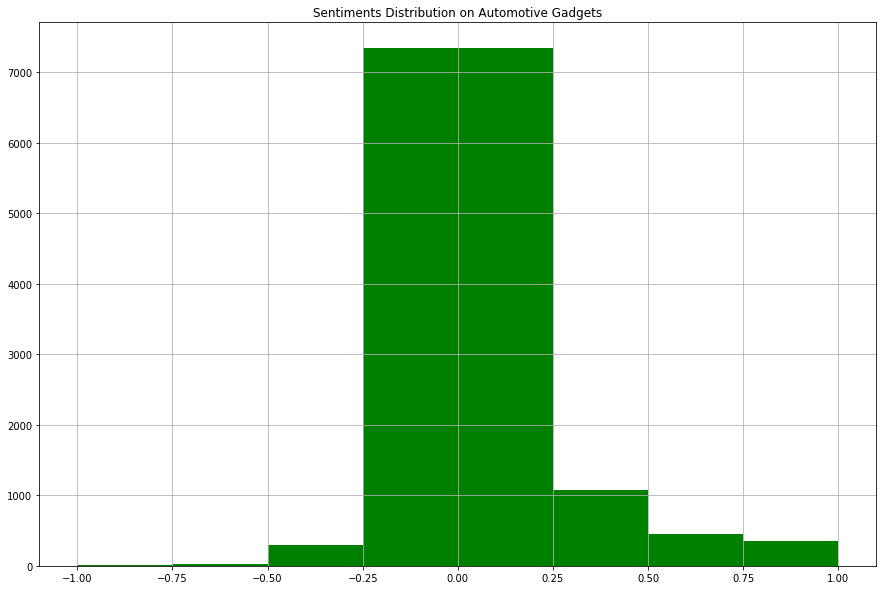

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

#Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1], ax=ax, color="green")
plt.title("Sentiments Distribution on Automotive Gadgets")
plt.show()

# Category from Polarity

In [ ]:
sentiment_df.groupby('Polarity').size()

Polarity
-1.00      3
-0.80     11
-0.70      8
-0.60      2
-0.60      6
        ... 
 0.75     17
 0.80    205
 0.85      1
 0.90      9
 1.00    124
Length: 449, dtype: int64

In [ ]:
bins=(-1.000000,-0.001000,0.000000,1.000000)
names=['Negative','Neutral','Positive']
sentiment_df['Polarity_type']=pd.cut(sentiment_df['Polarity'],bins,labels=names)

In [ ]:
sentiment_df.groupby('Polarity_type').size()

Polarity_type
Negative     765
Neutral     5528
Positive    3250
dtype: int64

In [ ]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9546 entries, 0 to 9545
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Polarity       9546 non-null   float64 
 1   User Comments  9546 non-null   object  
 2   Polarity_type  9543 non-null   category
dtypes: category(1), float64(1), object(1)
memory usage: 158.7+ KB


In [ ]:
sentiment_df.columns

Index(['Polarity', 'User Comments', 'Polarity_type'], dtype='object')

In [ ]:
sentiment_df.columns = ['Polarity', 'UserComments', 'Polarity_type']

In [ ]:
dfp = pd.DataFrame(data=sentiment_df,
                    columns=['Polarity', 'UserComments', 'Polarity_type'])
dfp

,Polarity,UserComments,Polarity_type
0,0.0,bought projector clueless connect iphon,Neutral
1,0.0,promis multi card reader leav review im still ...,Neutral
2,0.0,hello apeman team respond email fix issu multi...,Neutral
3,0.8,great pictur excit look k camerajust need pric...,Positive
4,0.0,bought apeman dashcam find rear camer cabl met...,Neutral
...,...,...,...
9541,0.3,see fun begin xboxnintendoswitch playstat,Positive
9542,0.0,inch fhd p dvr camera recorderwhatsappwechat a...,Neutral
9543,0.0,inch fhd p dvr camera record whatsappwechat au...,Neutral
9544,0.0,autobrighttech autobrighttech caraccessori aut...,Neutral


***Identify & Treat NaN***

In [ ]:
pandas.isnull(dfp)

,Polarity,UserComments,Polarity_type
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
9541,False,False,False
9542,False,False,False
9543,False,False,False
9544,False,False,False


In [ ]:
# importing pandas package
import pandas as pd

# making data frame from excel file
#dataN = pd.read_excel("export_User_Comments_Polarity_Category.xlsx")

# creating bool series True for NaN values
#dataN_series = pd.isnull(dataN["Polarity_type"])
dataN_series = pd.isnull(dfp["Polarity_type"])

# filtering data
# displayind data only with team = NaN
#dataN[dataN_series]
dfp[dataN_series]

,Polarity,UserComments,Polarity_type
832,-1.0,evil lurk night alexhest evil almost readi ssa...,NaN
5747,-1.0,worst case autonom futur requir pedestrian bic...,NaN
6747,-1.0,bleak futur singleoccup autonom car could incr...,NaN


In [ ]:
# importing pandas module 
import pandas as pd 

# making data frame from csv file 
#dataN2 = pd.read_excel("export_User_Comments_Polarity_Category.xlsx")

# replacing na values in college with No college 
#dataN2["Polarity_type"].fillna("Negative", inplace = True) 
dfp["Polarity_type"].fillna("Negative", inplace = True)

dfp

,Polarity,UserComments,Polarity_type
0,0.0,bought projector clueless connect iphon,Neutral
1,0.0,promis multi card reader leav review im still ...,Neutral
2,0.0,hello apeman team respond email fix issu multi...,Neutral
3,0.8,great pictur excit look k camerajust need pric...,Positive
4,0.0,bought apeman dashcam find rear camer cabl met...,Neutral
...,...,...,...
9541,0.3,see fun begin xboxnintendoswitch playstat,Positive
9542,0.0,inch fhd p dvr camera recorderwhatsappwechat a...,Neutral
9543,0.0,inch fhd p dvr camera record whatsappwechat au...,Neutral
9544,0.0,autobrighttech autobrighttech caraccessori aut...,Neutral


In [ ]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9546 entries, 0 to 9545
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Polarity       9546 non-null   float64 
 1   UserComments   9546 non-null   object  
 2   Polarity_type  9546 non-null   category
dtypes: category(1), float64(1), object(1)
memory usage: 158.7+ KB


In [ ]:
#Export to Excel
from pandas import ExcelWriter
writer = ExcelWriter('export_User_Comments_Polarity_Category.xlsx')
dfp.to_excel(writer,'Sheet1',index=False)
writer.save()

# EDA of Catarorized Data

In [ ]:
dfc = pd.read_excel('export_User_Comments_Polarity_Category.xlsx')

In [ ]:
dfc.columns
dfc.info()
dfc.shape

Index(['Polarity', 'UserComments', 'Polarity_type'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9546 entries, 0 to 9545
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Polarity       9546 non-null   float64
 1   UserComments   9540 non-null   object 
 2   Polarity_type  9546 non-null   object 
dtypes: float64(1), object(2)
memory usage: 223.9+ KB


(9546, 3)

In [ ]:
dfc.head()

,Polarity,UserComments,Polarity_type
0,0.0,bought projector clueless connect iphon,Neutral
1,0.0,promis multi card reader leav review im still ...,Neutral
2,0.0,hello apeman team respond email fix issu multi...,Neutral
3,0.8,great pictur excit look k camerajust need pric...,Positive
4,0.0,bought apeman dashcam find rear camer cabl met...,Neutral


In [ ]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

6.0
4.0


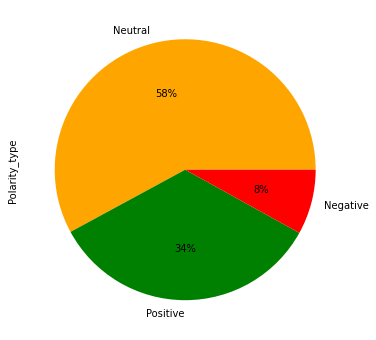

In [ ]:
dfc.Polarity_type.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["orange","green","red"])

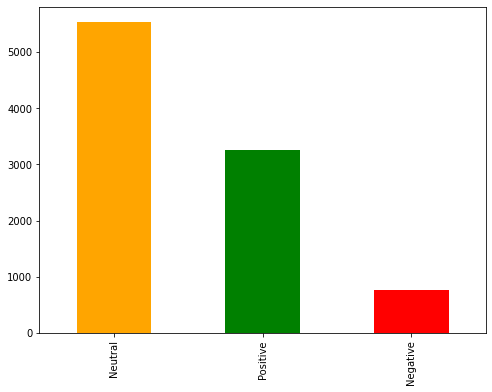

In [ ]:
dfc.Polarity_type.value_counts().plot(kind='bar',  color=["orange","green","red"])

# Label Encoding

In [ ]:
#convert Polaty_type Negative, Neutral and Positive to 1, 2, 3
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
le.fit(dfc['Polarity_type'])

LabelEncoder()

In [ ]:
list(le.classes_)

['Negative', 'Neutral', 'Positive']

In [ ]:
dfn = le.transform(dfc['Polarity_type'])

In [ ]:
le.inverse_transform([0,1,2])

array(['Negative', 'Neutral', 'Positive'], dtype=object)

In [ ]:
dfc['Category'] = dfn
dfc.info()
dfc.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9546 entries, 0 to 9545
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Polarity       9546 non-null   float64
 1   UserComments   9540 non-null   object 
 2   Polarity_type  9546 non-null   object 
 3   Category       9546 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 298.4+ KB


Index(['Polarity', 'UserComments', 'Polarity_type', 'Category'], dtype='object')

In [ ]:
dfc[3500:3520]

,Polarity,UserComments,Polarity_type,Category
3500,0.000000,meet mcdodo newest creation superstrong ledequ...,Neutral,1
3501,0.000000,fleec dog cloth pocket expawlor via amazingpro...,Neutral,1
3502,0.000000,dog jacket winter windproof water migohi via a...,Neutral,1
3503,-0.600000,dog jacket cold weather dog cloth pe phyxin vi...,Negative,0
3504,0.000000,reflect waterproof windproof dog co migohi via...,Neutral,1
3505,0.000000,make easi technologytechnolog tech innov engin...,Neutral,1
3506,-0.004545,new video ever use weird set wash machin watch...,Negative,0
3507,0.000000,check tech gadget watch gadget mobil arvshop,Neutral,1
3508,-0.121212,mhet live esp mini kit modul wifibluetooth int...,Negative,0
3509,0.214286,amazon alexa smart ring wearabl gadget tool co...,Positive,2


In [ ]:
#Export to Excel
from pandas import ExcelWriter
writer = ExcelWriter('export_User_Comments_Polarity_Category_Label.xlsx')
dfc.to_excel(writer,'Sheet1',index=False)
writer.save()

# TF-IDF

***Vectorizing Dataset using TF-IDF***

In [ ]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(corpus).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(processed_features, dfc.Category, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7636, 2119)
(1910, 2119)
(7636,)
(1910,)


# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

***Making Predictions and Evaluating the Model***

In [ ]:
predictions = text_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[ 134   24   12]
 [   0 1066    3]
 [   9   25  637]]
              precision    recall  f1-score   support

           0       0.94      0.79      0.86       170
           1       0.96      1.00      0.98      1069
           2       0.98      0.95      0.96       671

    accuracy                           0.96      1910
   macro avg       0.96      0.91      0.93      1910
weighted avg       0.96      0.96      0.96      1910

0.9617801047120419


In [ ]:
def clean_comment_length(UserComments):
    letters_only = re.sub("[^a-zA-Z]", " ",UserComments) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words) )

In [ ]:
def comment_to_words(UserComments):
    letters_only = re.sub("[^a-zA-Z]", " ",UserComments) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

In [ ]:
dfc['clean_comment']=dfp['UserComments'].apply(lambda x: comment_to_words(x))
dfc['comment_length']=dfp['UserComments'].apply(lambda x: clean_comment_length(x))
train,test = train_test_split(dfc,test_size=0.25,random_state=42)

In [ ]:
train_clean_comment=[]
for comment in train['clean_comment']:
    train_clean_comment.append(comment)
test_clean_comment=[]
for comment in test['clean_comment']:
    test_clean_comment.append(comment)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_comment)
test_features=v.transform(test_clean_comment)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [ ]:
#Classifiers
Classifiers = [
    SVC(kernel="rbf", C=0.03, gamma = 'scale'),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    GradientBoostingClassifier(),GaussianNB()]

Accuracy of SVC is 0.585672392124005
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.59      0.74      2386
           2       0.00      1.00      0.00         1

    accuracy                           0.59      2387
   macro avg       0.33      0.53      0.25      2387
weighted avg       1.00      0.59      0.74      2387



<Figure size 576x432 with 0 Axes>

(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0d8134bf60>)

([<matplotlib.axis.XTick at 0x7f0d7db7de10>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Neutral'), Text(0, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x7f0d81864550>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Neutral'), Text(0, 0, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 576x432 with 0 Axes>

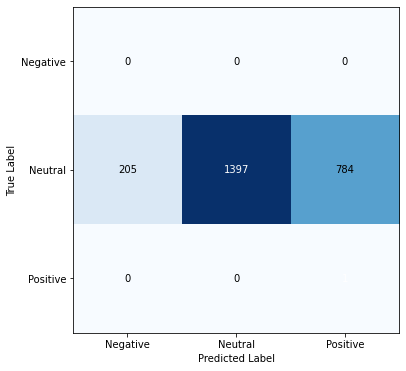

Accuracy of DecisionTreeClassifier is 0.9710934227063259
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       201
           1       0.98      0.98      0.98      1398
           2       0.97      0.96      0.97       788

    accuracy                           0.97      2387
   macro avg       0.95      0.95      0.95      2387
weighted avg       0.97      0.97      0.97      2387



<Figure size 576x432 with 0 Axes>

(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0d7cdbff28>)

([<matplotlib.axis.XTick at 0x7f0d7d05c9b0>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Neutral'), Text(0, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x7f0d7db8d9b0>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Neutral'), Text(0, 0, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 576x432 with 0 Axes>

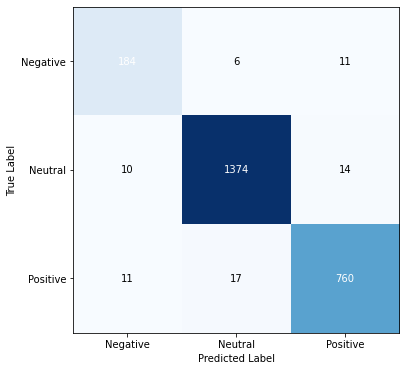

Accuracy of RandomForestClassifier is 0.9656472559698366
              precision    recall  f1-score   support

           0       0.81      0.95      0.88       176
           1       0.99      0.96      0.98      1440
           2       0.95      0.97      0.96       771

    accuracy                           0.97      2387
   macro avg       0.92      0.96      0.94      2387
weighted avg       0.97      0.97      0.97      2387



<Figure size 576x432 with 0 Axes>

(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0d7d1553c8>)

([<matplotlib.axis.XTick at 0x7f0d7d1221d0>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Neutral'), Text(0, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x7f0d7d122dd8>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Neutral'), Text(0, 0, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 576x432 with 0 Axes>

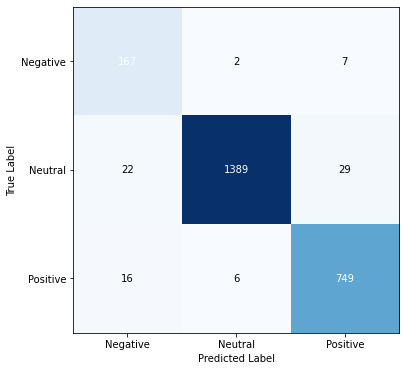

Accuracy of GradientBoostingClassifier is 0.9103477167993297
              precision    recall  f1-score   support

           0       0.60      0.90      0.72       137
           1       1.00      0.88      0.93      1585
           2       0.84      0.99      0.91       665

    accuracy                           0.91      2387
   macro avg       0.81      0.92      0.85      2387
weighted avg       0.93      0.91      0.91      2387



<Figure size 576x432 with 0 Axes>

(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0d821204e0>)

([<matplotlib.axis.XTick at 0x7f0d82122588>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Neutral'), Text(0, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x7f0d8212d208>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Neutral'), Text(0, 0, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 576x432 with 0 Axes>

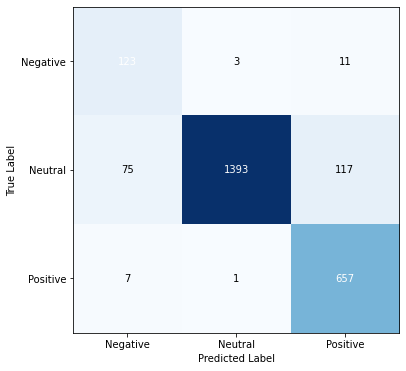

Accuracy of GaussianNB is 0.5806451612903226
              precision    recall  f1-score   support

           0       0.51      0.27      0.35       381
           1       0.45      0.87      0.60       725
           2       0.83      0.51      0.63      1281

    accuracy                           0.58      2387
   macro avg       0.60      0.55      0.53      2387
weighted avg       0.66      0.58      0.58      2387



<Figure size 576x432 with 0 Axes>

(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0d7d09f748>)

([<matplotlib.axis.XTick at 0x7f0d822746a0>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Neutral'), Text(0, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x7f0d8227b320>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Neutral'), Text(0, 0, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 576x432 with 0 Axes>

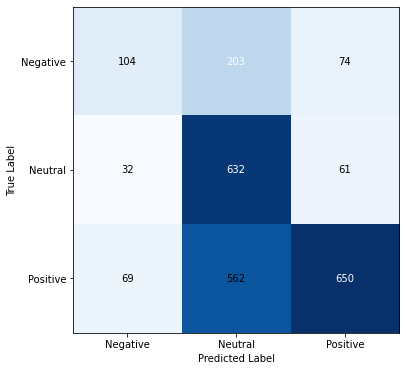

In [ ]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for clf in Classifiers:
    try:
        fit = clf.fit(train_features,train['Category'])
        pred = fit.predict(test_features)
    except Exception:
        fit = clf.fit(dense_features,train['Category'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['Category'])
    Accuracy.append(accuracy)
    Model.append(clf.__class__.__name__)
    print('Accuracy of '+clf.__class__.__name__+' is '+str(accuracy)) 
    print(classification_report(pred,test['Category']))
    
    #Confusion Matrix
    cm = confusion_matrix(pred,test['Category'])
    plt.figure()
    plot_confusion_matrix(cm,cmap=plt.cm.Blues)
    plt.xticks(range(3), ['Negative','Neutral','Positive'],color='black')
    plt.yticks(range(3), ['Negative','Neutral','Positive'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Multinomial Naive Bayes model

In [ ]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [ ]:
%time nb.fit(X_train, y_train)

CPU times: user 99.1 ms, sys: 982 µs, total: 100 ms
Wall time: 67 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test)

In [ ]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.8225130890052356

In [ ]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[  30,   95,   45],
       [   0, 1025,   44],
       [   6,  149,  516]])

# Topic Modeling

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
doc_term_matrix = count_vect.fit_transform(dfc['UserComments'].values.astype('U'))

In [ ]:
#Now let's look at our document term matrix:
doc_term_matrix

<9546x5699 sparse matrix of type '<class 'numpy.int64'>'
	with 77377 stored elements in Compressed Sparse Row format>

***Latent Dirichlet Allocation (LDA)***

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [ ]:
import random

for i in range(10):
    random_id = random.randint(0,len(count_vect.get_feature_names()))
    print(count_vect.get_feature_names()[random_id])

weekli
sa
district
feasibl
collabor
awesomenesshomedecor
mism
poker
suburb
intengin


In [ ]:
# Let's find 10 words with the highest probability for the first topic. To get the first topic, 
# you can use the components_ attribute and pass a 0 index as the value:
first_topic = LDA.components_[0]
print(first_topic)

[0.20000442 1.67313438 4.13714512 ... 2.37366284 2.19997865 4.20428282]


In [ ]:
top_topic_words = first_topic.argsort()[-10:]
print(top_topic_words)

[2784 4979 3377 4954 1747 1536  791 1643 2077 1645]


In [ ]:
for i in top_topic_words:
    print(count_vect.get_feature_names()[i])

kitchen
technolog
new
tech
ev
dropship
car
electr
gadget
electriccar


In [ ]:
#Let's print the 10 words with highest probabilities for all the five topics:
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['kitchen', 'technolog', 'new', 'tech', 'ev', 'dropship', 'car', 'electr', 'gadget', 'electriccar']


Top 10 words for topic #1:
['bluetooth', 'king', 'fm', 'usb', 'music', 'wireless', 'great', 'led', 'light', 'gadget']


Top 10 words for topic #2:
['techgadgetssmarttechcoolstuff', 'deal', 'smartphon', 'women', 'travel', 'electron', 'tech', 'watch', 'smart', 'gadget']


Top 10 words for topic #3:
['gift', 'dashboard', 'technolog', 'amp', 'googl', 'tech', 'new', 'shop', 'car', 'gadget']


Top 10 words for topic #4:
['work', 'hd', 'ai', 'autonom', 'robot', 'wifi', 'autonomousvehicl', 'gb', 'camera', 'car']




In [ ]:
topic_values = LDA.transform(doc_term_matrix)
topic_values.shape

(9546, 5)

In [ ]:
dfc['Topic'] = topic_values.argmax(axis=1)

In [ ]:
dfc.head(10)

,Polarity,UserComments,Polarity_type,Category,clean_comment,comment_length,Topic
0,0.0,bought projector clueless connect iphon,Neutral,1,bought projector clueless connect iphon,5,4
1,0.0,promis multi card reader leav review im still ...,Neutral,1,promis multi card reader leav review im still ...,10,1
2,0.0,hello apeman team respond email fix issu multi...,Neutral,1,hello apeman team respond email fix issu multi...,9,4
3,0.8,great pictur excit look k camerajust need pric...,Positive,2,great pictur excit look k camerajust need pric...,21,3
4,0.0,bought apeman dashcam find rear camer cabl met...,Neutral,1,bought apeman dashcam find rear camer cabl met...,15,4
5,0.0,possibl tri,Neutral,1,possibl tri,2,2
6,0.0,price,Neutral,1,price,1,4
7,0.0,terribl compani product china,Neutral,1,terribl compani product china,4,0
8,0.0,sayhidden design hid,Neutral,1,sayhidden design hid,3,3
9,0.0,hello camera apeman app use wifi,Neutral,1,hello camera apeman app use wifi,6,4


***Non-Negative Matrix Factorization (NMF)***

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_df=0.8, min_df=2, stop_words='english')
doc_term_matrix = tfidf_vect.fit_transform(dfc['UserComments'].values.astype('U'))

In [ ]:
# Once the document term matrix is generated, we can create a probability matrix that contains probabilities of all the words
# in the vocabulary for all the topics. To do so, we can use the NMF class from the sklearn.decomposition module. 
# Look at the following script:

from sklearn.decomposition import NMF

nmf = NMF(n_components=5, random_state=42)
nmf.fit(doc_term_matrix )

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=5, random_state=42, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [ ]:
#As we did in the previous section, let's randomly get 10 words from our vocabulary:
import random

for i in range(10):
    random_id = random.randint(0,len(tfidf_vect.get_feature_names()))
    print(tfidf_vect.get_feature_names()[random_id])

confer
clone
globalwarm
mohr
build
max
queensland
scissor
cloth
bulb


In [ ]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=5, random_state=42)
nmf.fit(doc_term_matrix )

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=5, random_state=42, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [ ]:
import random

for i in range(10):
    random_id = random.randint(0,len(tfidf_vect.get_feature_names()))
    print(tfidf_vect.get_feature_names()[random_id])

bed
waffl
christmasiscom
diy
rv
motorway
nice
shockproof
toothbrush
redempt


In [ ]:
first_topics = nmf.components_[0]
top_topic_words = first_topics.argsort()[-10:]

In [ ]:
for i in top_topic_words:
    print(tfidf_vect.get_feature_names()[i])

gift
deal
wireless
smart
travel
watch
electron
technolog
tech
gadget


In [ ]:
for i,topic in enumerate(nmf.components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['gift', 'deal', 'wireless', 'smart', 'travel', 'watch', 'electron', 'technolog', 'tech', 'gadget']


Top 10 words for topic #1:
['light', 'gadget', 'outdoor', 'kitchen', 'wholesal', 'accept', 'shopifi', 'aliepxress', 'shoponlin', 'dropship']


Top 10 words for topic #2:
['project', 'new', 'electricvehicl', 'autonomousvehicl', 'selfdriv', 'ev', 'dyson', 'electr', 'car', 'electriccar']


Top 10 words for topic #3:
['edit', 'hifi', 'love', 'sound', 'audio', 'gadget', 'music', 'mcintosh', 'fm', 'king']


Top 10 words for topic #4:
['gadget', 'purshas', 'amaz', 'choic', 'ff', 'style', 'dealstreetonlin', 'fashion', 'kid', 'shop']




In [ ]:
topic_values = nmf.transform(doc_term_matrix)
dfc['Topics'] = topic_values.argmax(axis=1)
dfc.head(5)

,Polarity,UserComments,Polarity_type,Category,clean_comment,comment_length,Topic,Topics
0,0.0,bought projector clueless connect iphon,Neutral,1,bought projector clueless connect iphon,5,4,0
1,0.0,promis multi card reader leav review im still ...,Neutral,1,promis multi card reader leav review im still ...,10,1,0
2,0.0,hello apeman team respond email fix issu multi...,Neutral,1,hello apeman team respond email fix issu multi...,9,4,2
3,0.8,great pictur excit look k camerajust need pric...,Positive,2,great pictur excit look k camerajust need pric...,21,3,2
4,0.0,bought apeman dashcam find rear camer cabl met...,Neutral,1,bought apeman dashcam find rear camer cabl met...,15,4,2


# Prediction Models

In [ ]:
dfpr = pd.read_excel('export_User_Comments_Polarity_Category_Label.xlsx')

In [ ]:
dfpr.head()

,Polarity,UserComments,Polarity_type,Category
0,0.0,bought projector clueless connect iphon,Neutral,1
1,0.0,promis multi card reader leav review im still ...,Neutral,1
2,0.0,hello apeman team respond email fix issu multi...,Neutral,1
3,0.8,great pictur excit look k camerajust need pric...,Positive,2
4,0.0,bought apeman dashcam find rear camer cabl met...,Neutral,1


In [ ]:
#Check for NaN values in each column
dfpr.isna().sum()
#Percentage of NaN values
((len(dfpr)-dfpr.count())/len(dfpr))*100

Polarity         0
UserComments     6
Polarity_type    0
Category         0
dtype: int64

Polarity         0.000000
UserComments     0.062854
Polarity_type    0.000000
Category         0.000000
dtype: float64

In [ ]:
#dfp.UserComments = dfp.UserComments.astype(str)
#dfp['UserComments'] = dfp['UserComments'].astype('|S')
dfpr['UserComments'] = dfpr['UserComments'].astype(str)

In [ ]:
dfpr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9546 entries, 0 to 9545
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Polarity       9546 non-null   float64
 1   UserComments   9546 non-null   object 
 2   Polarity_type  9546 non-null   object 
 3   Category       9546 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 298.4+ KB


# Comparison of Model Accuracies

<BarContainer object of 5 artists>

([<matplotlib.axis.XTick at 0x7f0d8041c748>,
 [Text(0, 0, 'SVC'),
  Text(0, 0, 'DecisionTreeClassifier'),
  Text(0, 0, 'RandomForestClassifier'),
  Text(0, 0, 'GradientBoostingClassifier'),
  Text(0, 0, 'GaussianNB')])

Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Model')

Text(0.5, 1.0, 'Classifier Accuracies')

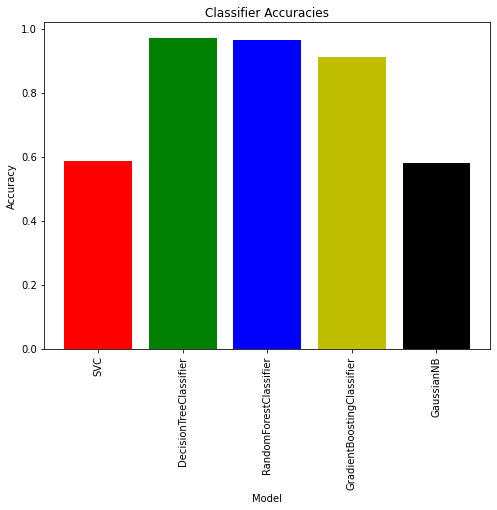

In [ ]:
index=list(range(len(Classifiers)))
plt.bar(index,Accuracy,color='rgbyk')
plt.xticks(index,Model,rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Classifier Accuracies')